Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,42 mins 15 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_milen_2wu3qh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.866 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Data                   Preco_Real    Preco_Dolar    Pontos    PT1    PA1    TPO1    TMA1    TME1    TMI1    URA1    URAMI1    VRMA1    VVME1    PT2    PA2    TPO2    TMA2    TME2    TMI2    URA2    URAMI2    VRMA2    VVME2    PT3    PA3    TPO3    TMA3    TME3    TMI3    URA3    URAMI3    VRMA3    VVME3    PT4    PA4    TPO4    TMA4    TME4    TMI4    URA4    URAMI4    VRMA4    VVME4    PT5    PA5    TPO5    TMA5    TME5    TMI5    URA5    URAMI5    VRMA5    VVME5    PT6    PA6    TPO6    TMA6    TME6    TMI6    URA6    URAMI6    VRMA6    VVME6    Ano
2023-01-02 00:00:00          1031            192   106.376      5    847      13      23      18      14      74        53        8        1      2    895      17      25      20      18      83        62        7        1      0    905      19      26      20      18      91        67       12        2      3    925      18      29      21     

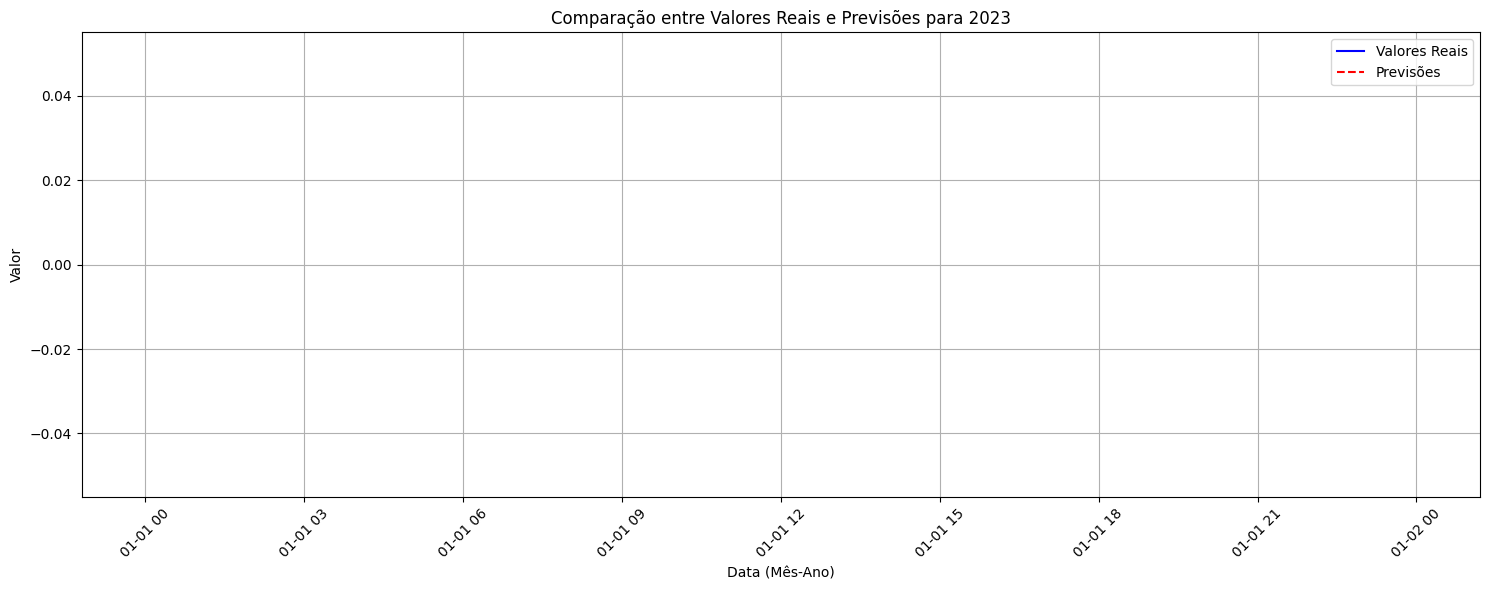

In [7]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# 1. Inicialização do H2O
h2o.init()

# 2. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv'
frame = h2o.import_file(path_to_csv)

# 3. Separação dos dados
# Cria uma nova coluna "Ano" com base na coluna de datas
frame['Ano'] = frame['Data'].year()
print(frame[frame['Ano'] == 2023])

# Separa o conjunto de validação para ser apenas 2023
validation = frame[frame['Ano'] == 2023]
train_test = frame[frame['Ano'] < 2023]

# Separação dos conjuntos de treino e teste
train, test = train_test.split_frame(ratios=[.85])

# 4. Construção do modelo usando apenas treino e teste
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")
x.remove("Ano")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=test)

# 5. Previsões (somente no conjunto de validação)
predictions_valid = aml.predict(validation)

# 6. Avaliação do modelo (no conjunto de validação)
performance_valid = aml.leader.model_performance(validation)
rmse_valid = performance_valid.rmse()
print(f"RMSE no conjunto de validação: {rmse_valid:.4f}")
print(performance_valid)

# 7. Combinação das previsões com os valores reais (somente no conjunto de validação)
validation_with_predictions = validation.cbind(predictions_valid)
actual_vs_predicted_valid = validation_with_predictions[["Data", y, "predict"]]
df_actual_vs_predicted_valid = actual_vs_predicted_valid.as_data_frame()

# 8. Visualização das previsões vs valores reais (somente para 2023)
df_actual_vs_predicted_valid['Data'] = pd.to_datetime(df_actual_vs_predicted_valid['Data'])
df_actual_vs_predicted_valid = df_actual_vs_predicted_valid[df_actual_vs_predicted_valid['Data'].dt.year == 2023]

# Plotting
plt.figure(figsize=(15, 6))
unique_dates = df_actual_vs_predicted_valid["Data"].dt.to_period('M').dt.to_timestamp().unique()
real_values = df_actual_vs_predicted_valid.groupby(df_actual_vs_predicted_valid["Data"].dt.to_period('M'))[y].mean().values
predicted_values = df_actual_vs_predicted_valid.groupby(df_actual_vs_predicted_valid["Data"].dt.to_period('M'))["predict"].mean().values

plt.plot(unique_dates, real_values, label="Valores Reais", color="blue")
plt.plot(unique_dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões para 2023")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

# 2. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
base = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv') 

In [9]:
base

,Data,Preco_Real,Preco_Dolar,Pontos,PT1,PA1,TPO1,TMA1,TME1,TMI1,...,PT6,PA6,TPO6,TMA6,TME6,TMI6,URA6,URAMI6,VRMA6,VVME6
0,2004-12-20,282,105,25.537,1.0,845.0,16.0,24.0,19.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-12-21,283,105,25.89,11.0,846.0,14.0,19.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-12-22,271,100,25.723,18.0,846.0,11.0,15.0,13.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-12-23,284,105,25.878,1.0,843.0,12.0,22.0,15.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-12-27,285,106,25.937,17.0,846.0,13.0,20.0,16.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,2023-10-24,876,175,"113.761,90",0.0,846.0,12.0,27.0,20.0,13.0,...,NaN,905.0,15.0,32.0,25.0,17.0,59.0,34.0,11.0,2.0
4699,2023-10-25,851,170,"112.829,97",0.0,844.0,14.0,24.0,18.0,15.0,...,NaN,904.0,17.0,30.0,24.0,19.0,69.0,41.0,10.0,2.0
4700,2023-10-26,848,170,"114.776,86",0.0,843.0,15.0,23.0,18.0,15.0,...,NaN,903.0,18.0,30.0,23.0,18.0,76.0,47.0,9.0,2.0
4701,2023-10-27,842,168,"113.301,35",9.0,845.0,15.0,23.0,18.0,14.0,...,NaN,906.0,19.0,29.0,23.0,19.0,81.0,52.0,7.0,1.0
